### Demo notebook to add a parcellation on top of the surface

Done:
1. Create our own mesh of the plane (2 faces of right angle square)
1.a. Create a square plane with 2 faces and basic coordinates
1.b. Change the coordinates to be in the middle of the brain
2. Add those faces and vertices to the brain vertices and faces

Todo:

3. Adjust the coordinates of the plane to look like it cuts the brain (with an angle)
4. Adjust the coordinates to match the volume coordinates of a slice
5. Add option to change position of the plane on the x axis
6. Add an option to change the plane view (axes)
7. Add an option to add more than one plane

In [1]:
# import libraries
import os, sys
from matplotlib_surface_plotting import plot_surf
import nibabel as nb
import numpy as np


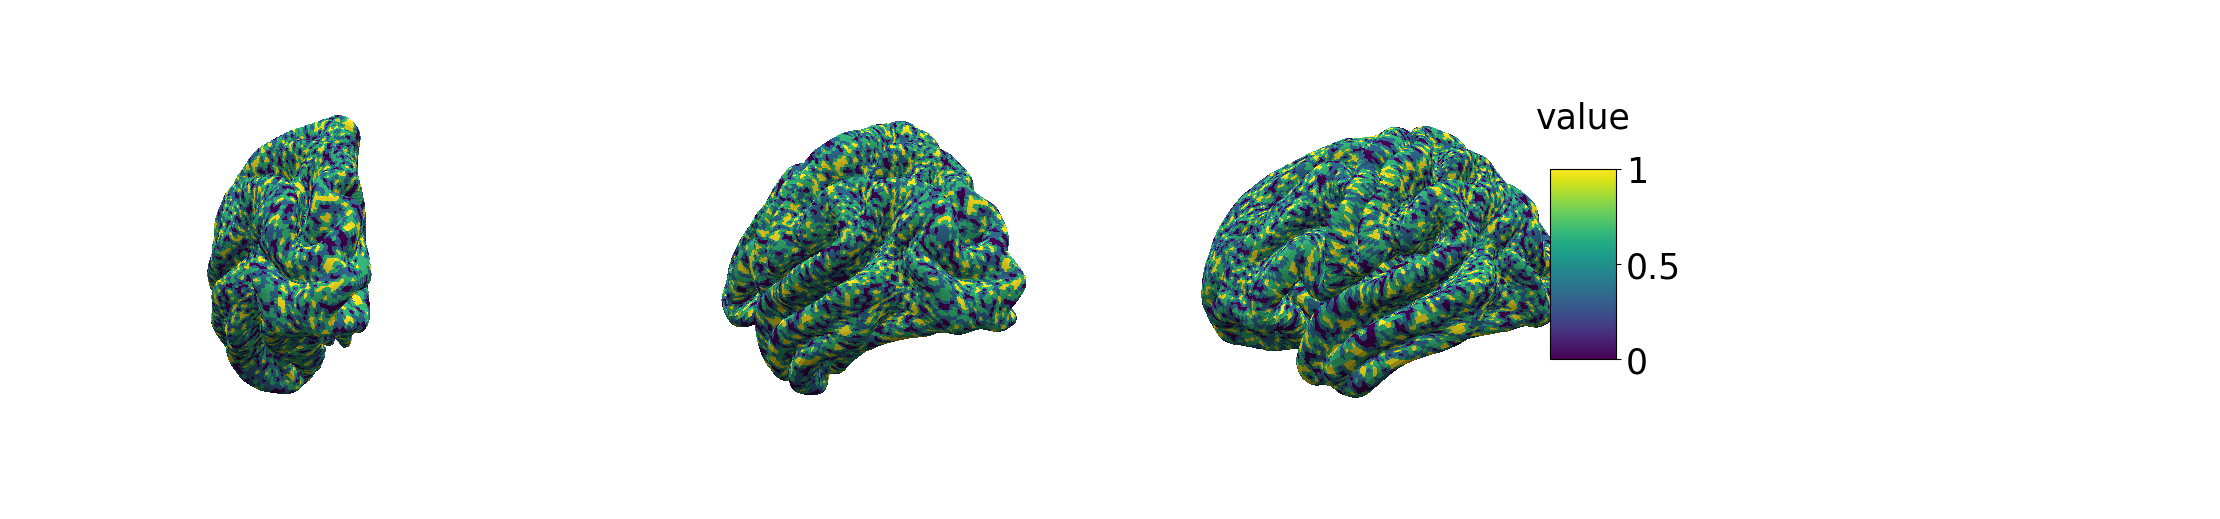

In [2]:
# get the brain vertices and faces from MNI brain
import random
gii_file= nb.load('../../michack_project_data/fs_LR.32k.L.pial.surf.gii')
vertices_brain = gii_file.darrays[0].data
faces_brain = gii_file.darrays[1].data
# overlay_brain = np.ones(len(vertices_brain))
overlay_brain = np.array([random.choice(range(2)) for _ in range(len(vertices_brain))])

plot_surf(vertices_brain, faces_brain, overlay_brain, 
          rotate=[0, 45, 90], vmin=0, vmax=1,)

In [ ]:
# # get the brain vertices and faces
# vertices_brain, faces_brain=nb.freesurfer.io.read_geometry('../data/lh.inflated')
# overlay_brain = nb.freesurfer.io.read_morph_data('../data/lh.thickness')

# plot_surf(vertices_brain, faces_brain, overlay_brain, 
#           rotate=[0, 45, 90], vmin=0, vmax=100,
#          )

In [ ]:
# create the plane vertices and faces
# faces_plane = np.array([[0,1,2],[1,3,2]])
# # vertices_plane = np.array([[0,0,0],[1,0,0],[1,1,0],[0,1,0]])
# vertices_plane = np.array([[-1,-1,-1],[1,-1.25,-1],[-1,-1,1],[1,-1.25,1]])
# overlay_plane = np.array([1,1,1,1])

# plot_surf(vertices_plane, faces_plane, overlay_plane, 
#           rotate=[0, 45, 90]
#          )

(197, 233, 189)


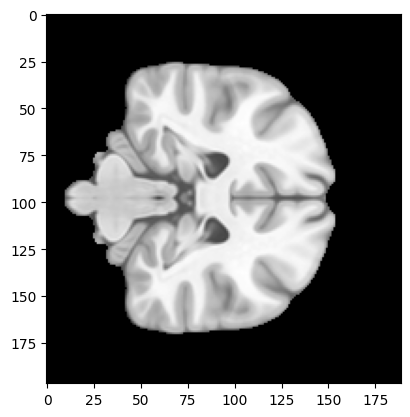

In [3]:
# upload the MRI slice
import matplotlib.pyplot as plt

brain_file = nb.load('../../michack_project_data/MNI152_T1_1mm.nii.gz')
brain_vol = brain_file.get_fdata()

print(brain_vol.shape)
# plt.imshow(np.flipud(brain_vol[:, 100, :].T), cmap='gray')
# brain_vol_tmp = brain_vol
plt.imshow(brain_vol[:, 100, :], cmap='gray')

In [176]:
# # get the coordinates of the MRI slice
# import numpy as np

# affine = brain_file.affine
# shape = brain_file.shape
# resolution = brain_file.header['pixdim'][1:4]

# # Create grid of voxel indices
# i = np.arange(0, shape[0], resolution[0])
# j = np.arange(0, shape[1], resolution[1])
# k = np.arange(0, shape[2], resolution[2])

# I, J, K = np.meshgrid(i, j, k, indexing='ij')

# # Flatten and convert voxel indices to world (MNI) coordinates
# vox_coords = np.column_stack((I.ravel(), J.ravel(), K.ravel(), np.ones(I.size)))
# mri_coords = vox_coords @ affine.T 
# mri_coords = mri_coords[:, :3] 

# mri_coords

In [ ]:
# print(mri_coords.min(axis=0))
# print(mri_coords.max(axis=0))

[ -98. -134.  -72.]
[ 98.  98. 116.]


In [4]:
M = brain_file.affine[:3, :3]
abc = brain_file.affine[:3, 3]
shape = brain_file.shape
def f(i, j, k):
   """ Return X, Y, Z coordinates for i, j, k """
   return M.dot([i, j, k]) + abc

[[-98. -34. -72.]
 [ 99. -44. -72.]
 [-98. -34. 117.]
 [ 99. -44. 117.]]


/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:82: RuntimeWarning: invalid value encountered in divide
  intensity = (1-shading)+shading*(intensity-np.min(intensity))/((np.percentile(intensity,80)-np.min(intensity)))
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:329: RuntimeWarning: invalid value encountered in divide
  colours = (colours - colours.min())/(colours.max()-colours.min())


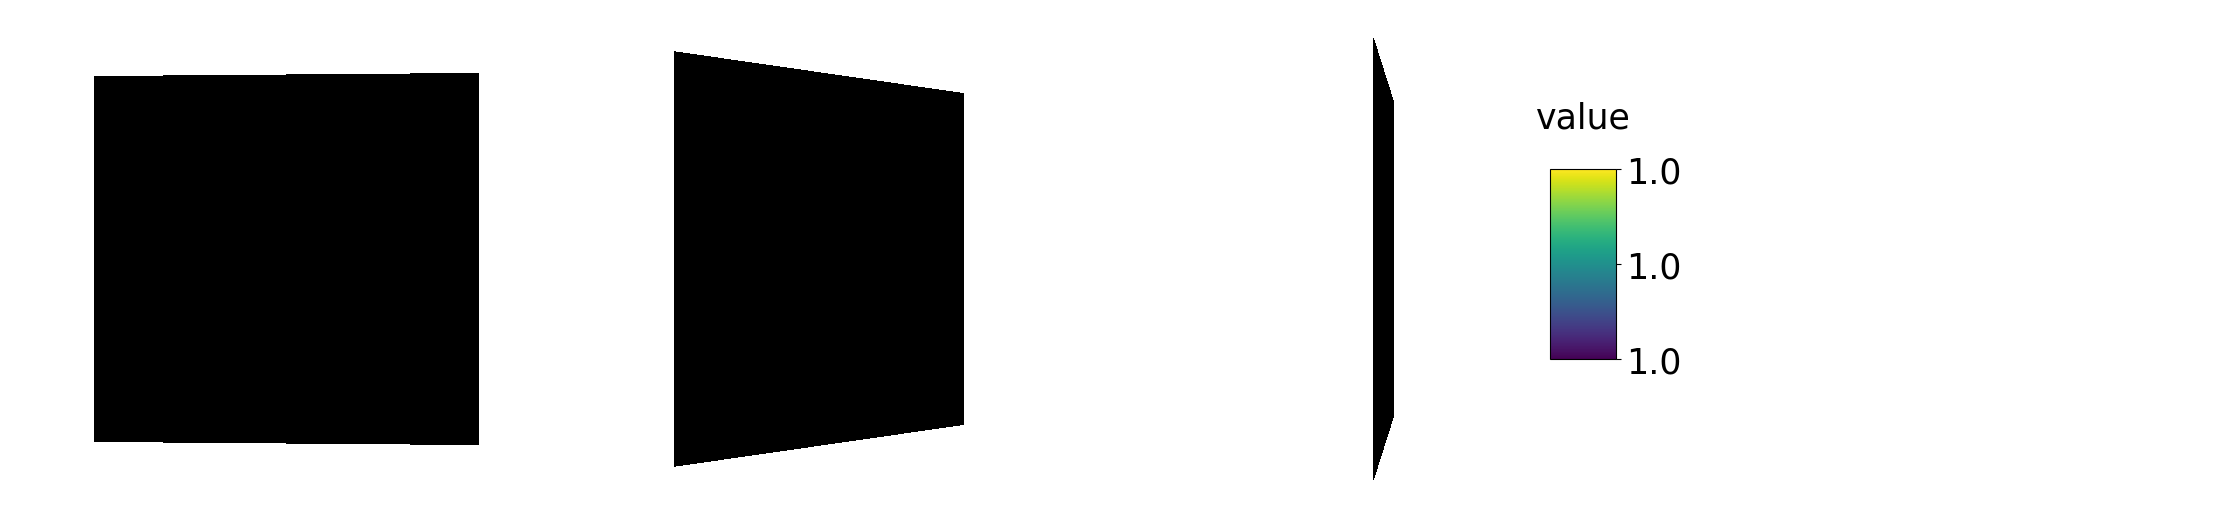

In [10]:

# create the vertices forming the plane
y = 100
yangle=-10

# define coordonates of the 4 vertices of the square plane
v0 = f(0,y,0) # bottom left
v1 = f(shape[0],y+yangle,0) # bottom right
v2 = f(0,y,shape[2]) # top left
v3 = f(shape[0],y+yangle,shape[2]) # top right

vertices_plane = np.array([v0, v1, v2, v3])
print(vertices_plane)

# create the faces (triangles) forming the square plane
f1 = [0,1,2] 
f2 = [1,3,2] 
faces_plane = np.array([f1,f2])

# create the overlay for the square
overlay_plane = np.array([1,1,1,1])

# plot the plane
plot_surf(vertices_plane, faces_plane, overlay_plane, 
          rotate=[0, 45, 90]
         )

/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:82: RuntimeWarning: invalid value encountered in divide
  intensity = (1-shading)+shading*(intensity-np.min(intensity))/((np.percentile(intensity,80)-np.min(intensity)))
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:329: RuntimeWarning: invalid value encountered in divide
  colours = (colours - colours.min())/(colours.max()-colours.min())


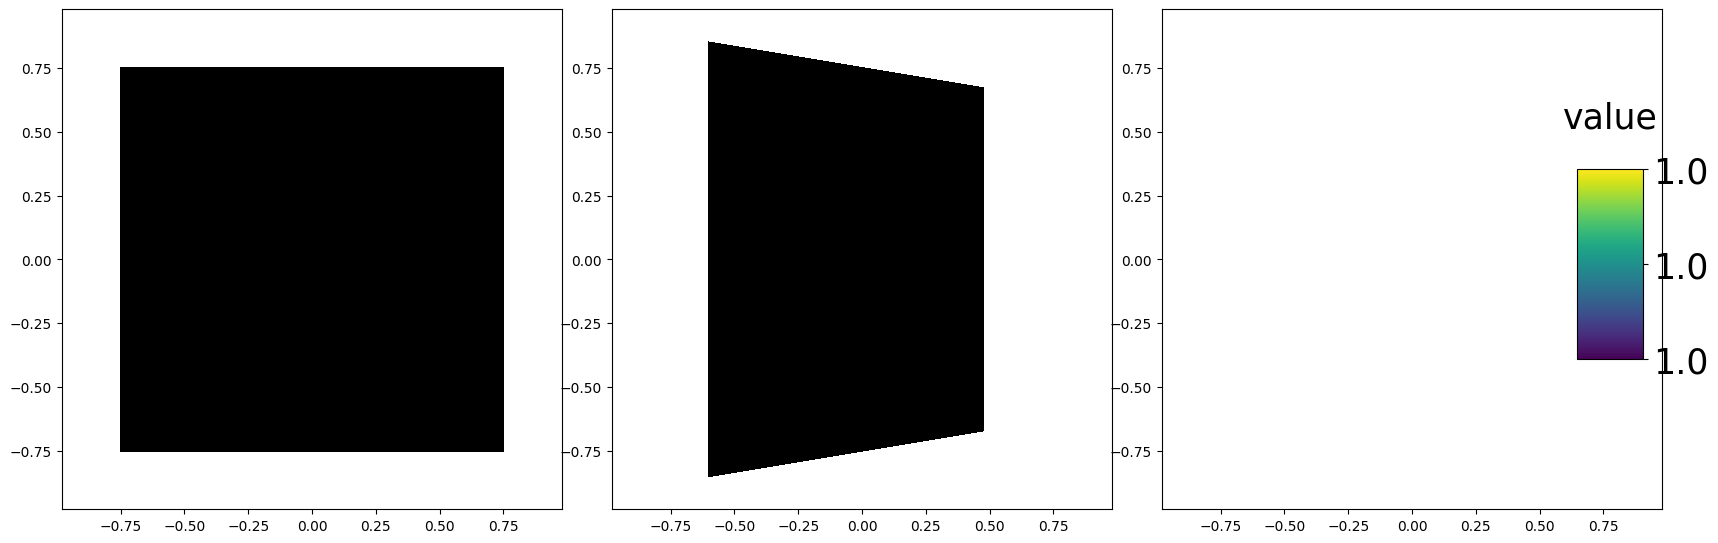

In [ ]:
# # create the plane vertices and faces matching the MRI slice

# # create the vertices forming the plane
# v1 = [-1,-1,-1] # bottom left
# v2 = [1,-1,-1] # bottom right
# v3 = [-1,-1,1] # top left
# v4 = [1,-1,1] # top right
# vertices_plane = np.array([v1, v2, v3, v4])
# # create the faces (triangles) forming the square plane
# f1 = [0,1,2] 
# f2 = [1,3,2] 
# faces_plane = np.array([f1,f2])
# # vertices_plane = np.array([[0,0,0],[1,0,0],[1,1,0],[0,1,0]])

# overlay_plane = np.array([1,1,1,1])

# plot_surf(vertices_plane, faces_plane, overlay_plane, 
#           rotate=[0, 45, 90]
#          )

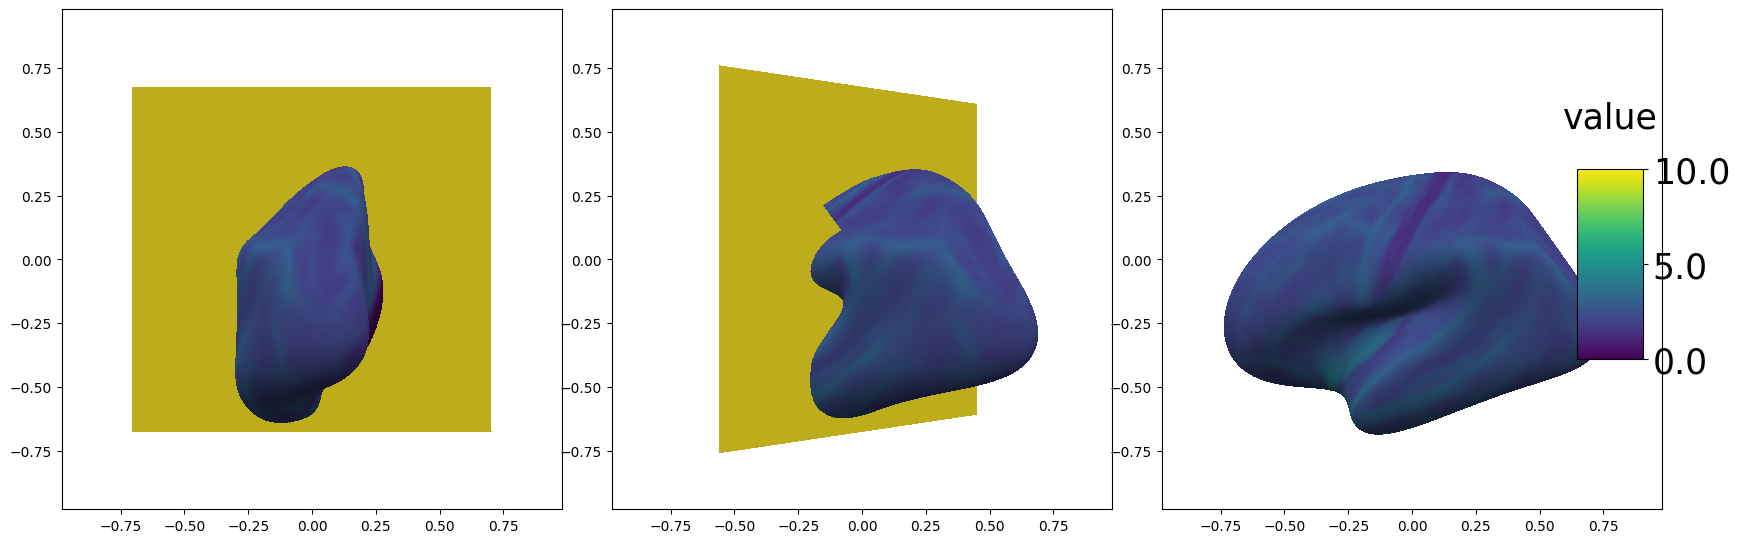

In [ ]:
# # combine brain and plane vertices and faces
# vertices_plane_new = vertices_plane*(np.max(vertices_brain,axis=0)*np.array([1,0.5,1])+20)
# faces_plane_new = faces_plane+len(vertices_brain)
# # update plane vertices and faces to match the brain scale
# vertices = np.vstack([vertices_brain, vertices_plane_new ])
# faces = np.vstack([faces_brain, faces_plane_new])
# overlay = np.hstack([overlay_brain, overlay_plane*10])
# plot_surf(vertices, faces, overlay, 
#           rotate=[0, 45, 90],
#          )

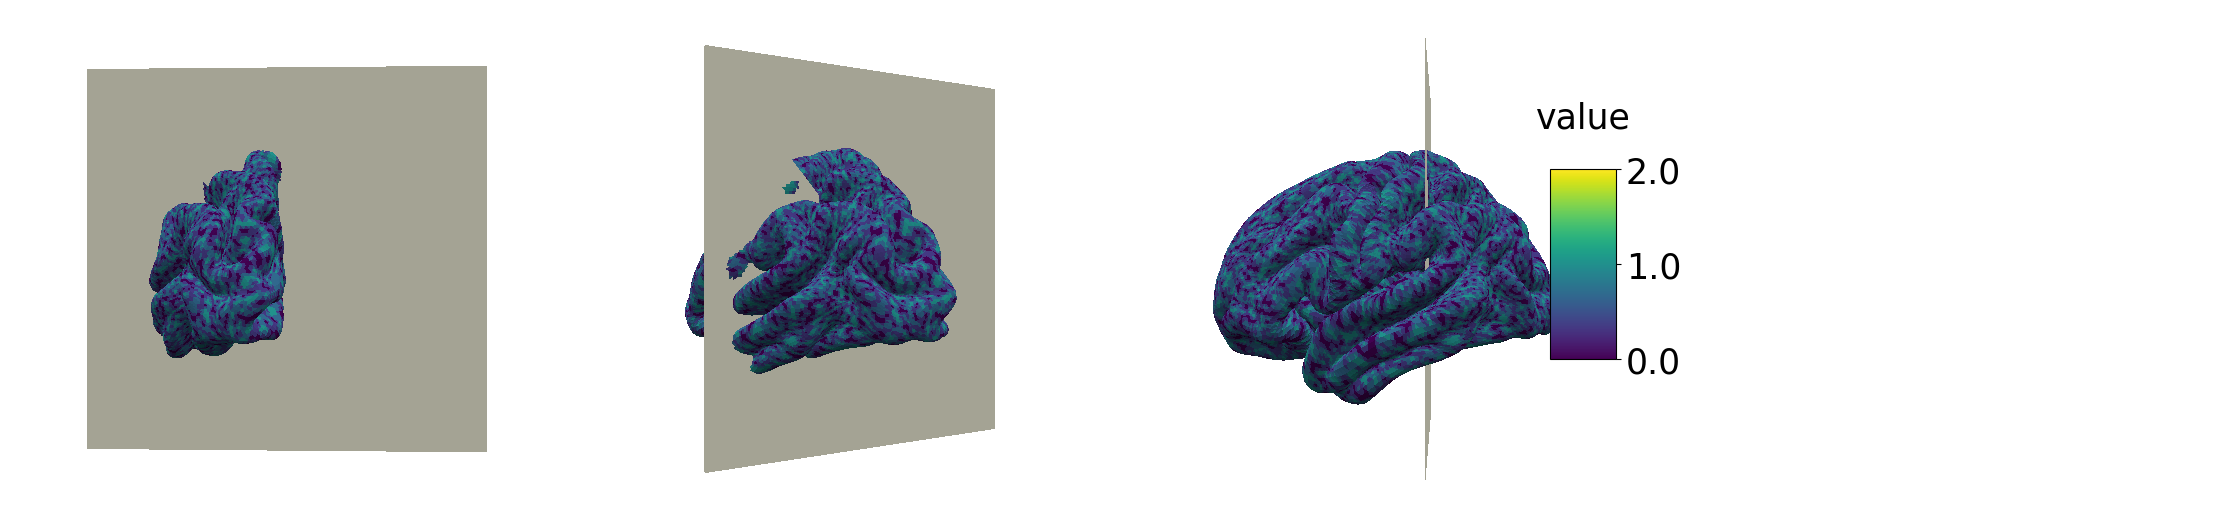

In [62]:
# combine brain and plane vertices and faces

# update plane vertices and faces to match the brain scale
vertices = np.vstack([vertices_brain, vertices_plane])

faces = np.vstack([faces_brain, faces_plane+len(vertices_brain)])
overlay = np.hstack([overlay_brain, overlay_plane*2])

alpha = np.ones(len(vertices))
alpha[-4::] = alpha[-4::]*0.1

# parcel = np.zeros(len(vertices))
# parcel[-4::] = 1

plot_surf(vertices, faces, overlay, 
          rotate=[0, 45, 90], 
          alpha_colour=alpha,
          # parcel = parcel,
          # filled_parcels = False
            # show_back=True,
        #   vmin=10,vmax=101
         )